# Project: Bosch Manufacturing Line

## II. Statistical Analysis

------

__Author:__ [Ryan Harper](www.kimrharper.com) <br><br>
__Data Source:__ [Bosch Dataset via Kaggle](https://www.kaggle.com/c/bosch-production-line-performance/data) <br> <br>
__Background:__ Bosch is a home appliance and industrial tools manufacturing company. In 2017, Bosch supplied Kaggle.com with manufacturing data to promote a competition. The goal of the competition was to determine factors that influence whether or not the product passes the final response stage of manufacturing and to predict which products are likely to fail based on this manufacturing process.<br> <br>
__The Data:__ Early exploration of this data will use a subset of the big data provided by Bosch. The data is provided by [Hitesh, John, and Matthew via PDX Data Science Meetup](https://www.meetup.com/Portland-Data-Science-Group/events/257370691/). The data subset is divided into 2 groups of 3 files (3 training, 3 test). Each group has one csv file each for numerical features ('numeric'), dates ('date'), and the manufacturing path ('cat'). The data subset includes a larger percentage of products that failed the response test, but not much more is known about this subsampling method.<br><br>
__Assumptions:__ ID # represents a specific product and that there is only one product. The differences in assembly are due to customization and/or differences between lines.<br><br>
__Goal:__ Predict which products will fail the response test. <br><br>

----

In [1]:
# imports
import pandas as pd; import missingno as msno; import matplotlib.pyplot as plt; import seaborn as sns;import numpy as np;import warnings
from sklearn import preprocessing; from scipy import stats

# settings
np.seterr(divide='warn', invalid='warn'); sns.set_style("whitegrid");warnings.filterwarnings('ignore')

-----

### A. Numerical Data

In [2]:
%%time
# import numerical data
mf_num_data = pd.read_csv('bosch_small_data/train_numeric.csv',low_memory=False)

Wall time: 9.68 s


In [6]:
# split the strings
columns_set = list(mf_num_data.columns)[1:-1]
breakup_strings = [i.split('_') for i in columns_set]

# store the values in separate containers
line_count = set([i[0] for i in breakup_strings[0:-1]])
station_count = set([i[1] for i in breakup_strings[0:-1]])
feature_count = set([i[2] for i in breakup_strings[0:-1]])

print('Unique lines: {}\nUnique Stations: {}\nUnique Feature Measurements: {}'.format(
    len(line_count),len(station_count),len(feature_count)))

Unique lines: 4
Unique Stations: 50
Unique Feature Measurements: 967


In [3]:
# show data with pandas
mf_num_data.head(2)

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,71,-0.167,-0.168,0.276,0.33,0.074,0.161,0.052,0.248,0.163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


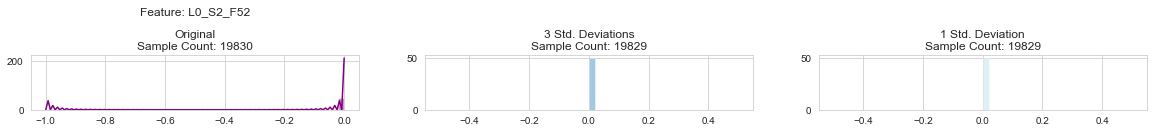

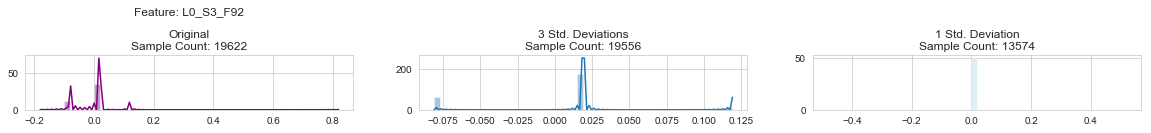

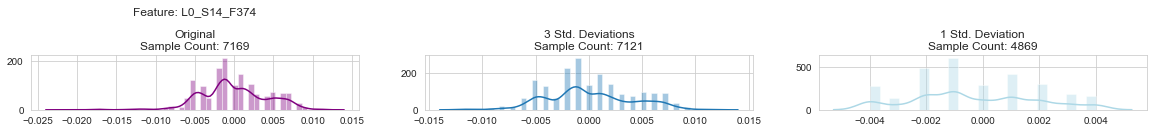

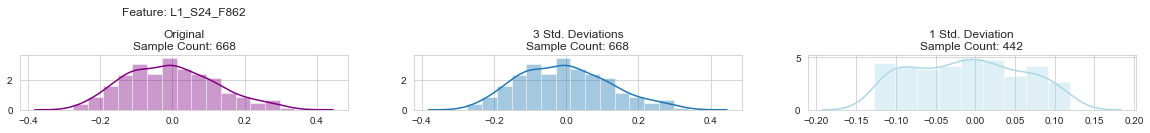

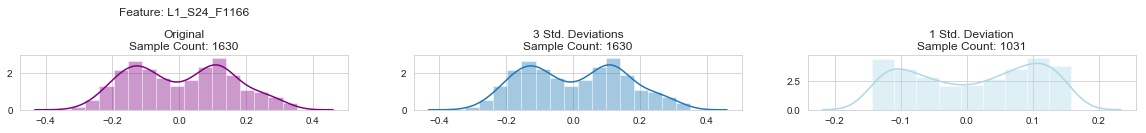

In [4]:
def plot_dist(df, col_index):
    c = df.columns[col_index]
    s_old = df[c].dropna()
    s_3 = df[c][np.abs(df[c]-df[c].mean()) <= (3*df[c].std())]
    s_1 = df[c][np.abs(df[c]-df[c].mean()) <= (1*df[c].std())]
    
    plt.figure(figsize=(20,1))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
    
    plt.subplot(1, 3, 1)
    plt.title('Feature: {}\n\nOriginal\nSample Count: {}'.format(c,len(df[c].dropna())))
    sns.distplot(s_old,color='purple')
    plt.xlabel('')
    
    plt.subplot(1, 3, 2)
    plt.title('3 Std. Deviations\nSample Count: {}'.format(len(s_3.dropna())))
    sns.distplot(s_3)
    plt.xlabel('')

    plt.subplot(1, 3, 3)
    plt.title('1 Std. Deviation\nSample Count: {}'.format(len(s_1.dropna())))
    sns.distplot(s_1,color='lightblue')
    plt.xlabel('')
    
[plot_dist(mf_num_data,i) for i in [20,30,100,200,260]];

In [5]:
# finds 'nonnormal distributions'
nonnormal = []
for i,c in enumerate(columns_set):
    k,p = stats.normaltest(mf_num_data[c].dropna().values)
    if p >.001:
        nonnormal.append([c,i,p,k])           

NameError: name 'columns_set' is not defined